In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix  

In [2]:
data1= pd.read_excel(r"C:\Users\Akash Jha\Downloads\Contraceptive_method_dataset.xlsx")

In [3]:
data1.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
data1.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [6]:
data1.shape

(1473, 10)

In [7]:
data1.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [8]:
#Clean Data
data1['Wife_age'] = data1['Wife_age'].fillna(data1['Wife_age'].median())
data1['No_of_children_born']=data1['No_of_children_born'].fillna(data1['No_of_children_born'].median())

In [9]:
#Change type of husband occupation as its object encoded
data1['Husband_Occupation']=data1['Husband_Occupation'].astype('object')
#Remove space from Column Names
data1.columns = data1.columns.str.replace(' ', '')

In [10]:
data1['Wife_education'].unique()

array(['Primary', 'Uneducated', 'Secondary', 'Tertiary'], dtype=object)

In [11]:
data1['Husband_education'].unique()

array(['Secondary', 'Primary', 'Tertiary', 'Uneducated'], dtype=object)

In [12]:
data1['Wife_religion'].unique()

array(['Scientology', 'Non-Scientology'], dtype=object)

In [13]:
data1['Wife_Working'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data1['Standard_of_living_index'].unique()

array(['High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [15]:
data1['Media_exposure'].unique()

array(['Exposed', 'Not-Exposed'], dtype=object)

In [16]:
data1['Contraceptive_method_used'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data1['Standard_of_living_index']= np.where(data1['Standard_of_living_index']== 'Very High','VeryHigh' ,data1['Standard_of_living_index'])

In [18]:
data1['Standard_of_living_index']= np.where(data1['Standard_of_living_index']== 'Very Low','VeryLow' ,data1['Standard_of_living_index'])

In [19]:
# Univariate Analysis for categorical variables

In [20]:
import warnings
warnings.filterwarnings('ignore')

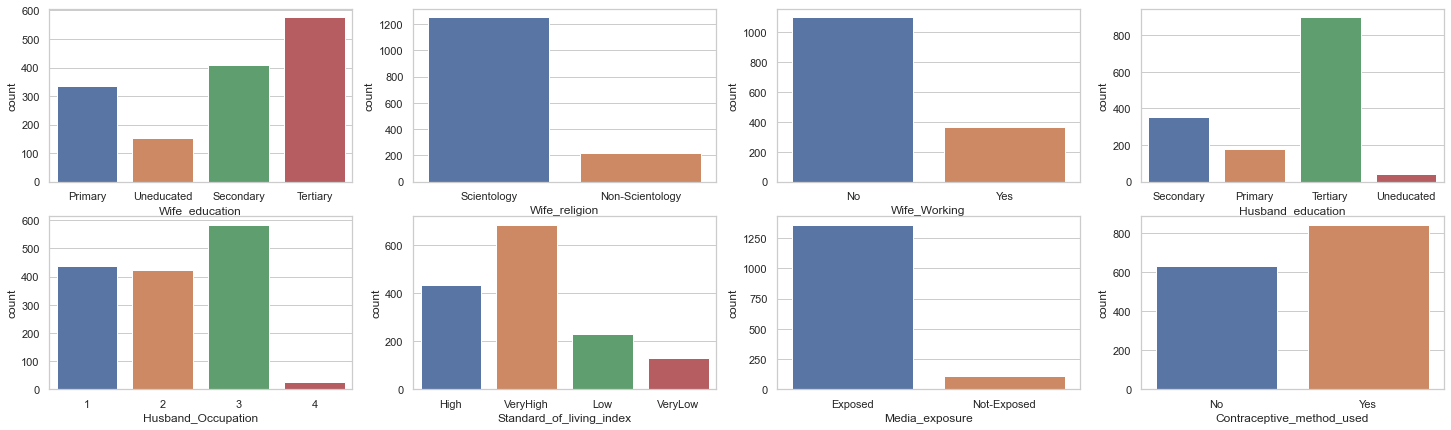

In [21]:
figdims=(25,7)
fig,axs=plt.subplots(nrows=2,ncols=4,figsize=figdims)
sns.countplot(data1.Wife_education,ax=axs[0][0])
sns.countplot(data1.Wife_religion,ax=axs[0][1])
sns.countplot(data1.Wife_Working,ax=axs[0][2])
sns.countplot(data1.Husband_education,ax=axs[0][3])
sns.countplot(data1.Husband_Occupation,ax=axs[1][0])
sns.countplot(data1.Standard_of_living_index,ax=axs[1][1])
sns.countplot(data1.Media_exposure,ax=axs[1][2])
sns.countplot(data1.Contraceptive_method_used,ax=axs[1][3])
plt.show()

<AxesSubplot:xlabel='Wife_age', ylabel='count'>

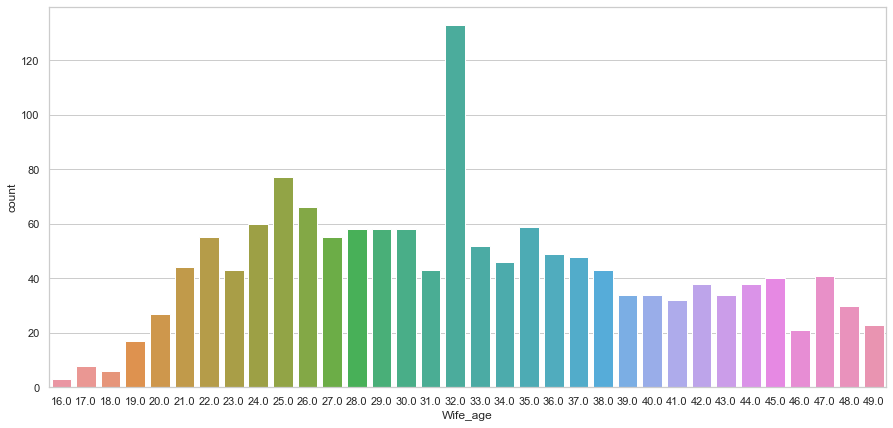

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data1.Wife_age)

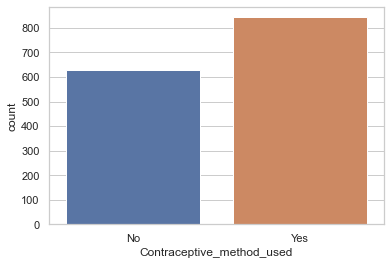

In [25]:
sns.countplot(df1.Contraceptive_method_used);

In [26]:
df1['Contraceptive_method_used'].value_counts(1)

Yes    0.57298
No     0.42702
Name: Contraceptive_method_used, dtype: float64

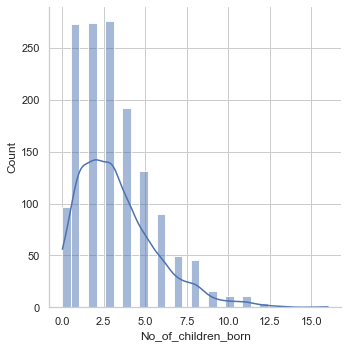

In [27]:
sns.displot(data1['No_of_children_born'],kde=True);

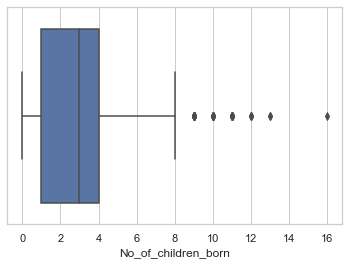

In [28]:
sns.boxplot(x=data1['No_of_children_born']);

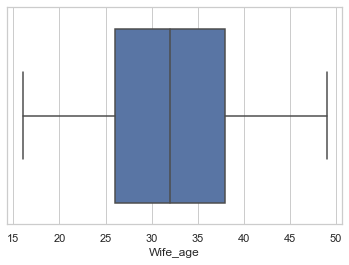

In [29]:
sns.boxplot(x=data1['Wife_age']);

In [30]:
data1.drop_duplicates(keep=False,inplace=True)

In [31]:
data1.shape

(1313, 10)

<AxesSubplot:>

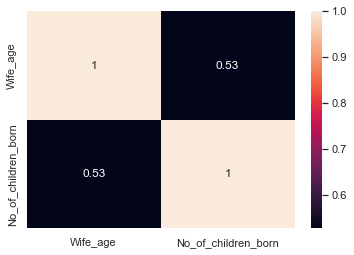

In [32]:
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

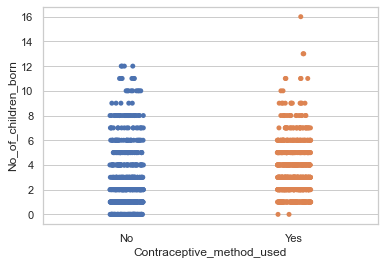

In [33]:
sns.stripplot(data1['Contraceptive_method_used'],data1['No_of_children_born'])

In [34]:
data1.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,VeryHigh,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,VeryHigh,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [35]:
# Lets Encode the variables

In [36]:
df1=data1.copy()

In [37]:
df1.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,VeryHigh,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,VeryHigh,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [38]:
# Lets Encode Data So we can Do Bivariate Analysis and Apply Different supervised methods

In [39]:
df1['Wife_education']=np.where(df1['Wife_education']=='Uneducated',1,df1['Wife_education'])
df1['Wife_education']=np.where(df1['Wife_education']=='Primary',2,df1['Wife_education'])
df1['Wife_education']=np.where(df1['Wife_education']=='Secondary',3,df1['Wife_education'])
df1['Wife_education']=np.where(df1['Wife_education']=='Tertiary',4,df1['Wife_education'])

In [40]:
df1['Husband_education']=np.where(df1['Husband_education']=='Uneducated',1,df1['Husband_education'])
df1['Husband_education']=np.where(df1['Husband_education']=='Primary',2,df1['Husband_education'])
df1['Husband_education']=np.where(df1['Husband_education']=='Secondary',3,df1['Husband_education'])
df1['Husband_education']=np.where(df1['Husband_education']=='Tertiary',4,df1['Husband_education'])

In [41]:
df1['Wife_religion']=np.where(df1['Wife_religion']=='Scientology',0,df1['Wife_religion'])
df1['Wife_religion']=np.where(df1['Wife_religion']=='Non-Scientology',1,df1['Wife_religion'])

In [42]:
df1['Wife_Working']=np.where(df1['Wife_Working']=='Yes',0,df1['Wife_Working'])
df1['Wife_Working']=np.where(df1['Wife_Working']=='No',1,df1['Wife_Working'])

In [43]:
df1['Standard_of_living_index']=np.where(df1['Standard_of_living_index']=='VeryLow',1,df1['Standard_of_living_index'])
df1['Standard_of_living_index']=np.where(df1['Standard_of_living_index']=='Low',2,df1['Standard_of_living_index'])
df1['Standard_of_living_index']=np.where(df1['Standard_of_living_index']=='VeryHigh',3,df1['Standard_of_living_index'])
df1['Standard_of_living_index']=np.where(df1['Standard_of_living_index']=='High',4,df1['Standard_of_living_index'])

In [44]:
df1['Media_exposure']=np.where(df1['Media_exposure']=='Exposed',0,df1['Media_exposure'])
df1['Media_exposure']=np.where(df1['Media_exposure']=='Not-Exposed',1,df1['Media_exposure'])

In [45]:
df1['Media_exposure']=np.where(df1['Media_exposure']=='Exposed',0,df1['Media_exposure'])
df1['Media_exposure']=np.where(df1['Media_exposure']=='Not-Exposed',1,df1['Media_exposure'])

In [46]:
df1['Contraceptive_method_used']=np.where(df1['Contraceptive_method_used']=='Yes',0,df1['Contraceptive_method_used'])
df1['Contraceptive_method_used']=np.where(df1['Contraceptive_method_used']=='No',1,df1['Contraceptive_method_used'])

In [47]:
# After Encoding We can Do Bivariate Analysis
df1.describe()

,Wife_age,No_of_children_born
count,1313.000000,1313.000000
mean,32.498096,3.323686
std,8.130802,2.420289
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,38.000000,5.000000
max,49.000000,16.000000


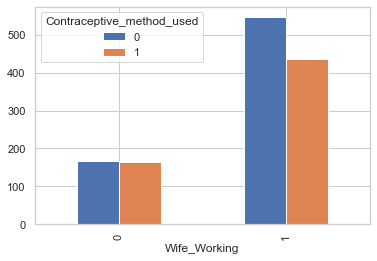

In [48]:
pd.crosstab(df1.Wife_Working,df1.Contraceptive_method_used).plot(kind='bar')
plt.show()

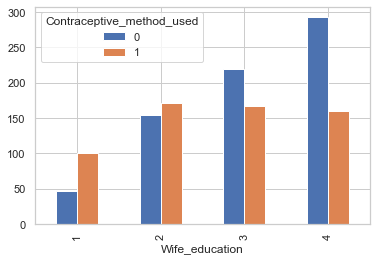

In [49]:
pd.crosstab(df1.Wife_education,df1.Contraceptive_method_used).plot(kind='bar')
plt.show()

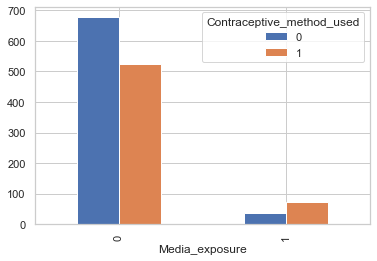

In [50]:
pd.crosstab(df1.Media_exposure,df1.Contraceptive_method_used).plot(kind='bar')
plt.show()

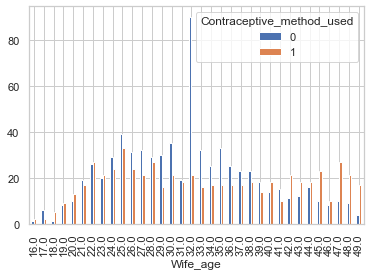

In [51]:
pd.crosstab(df1.Wife_age,df1.Contraceptive_method_used).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='No_of_children_born'>

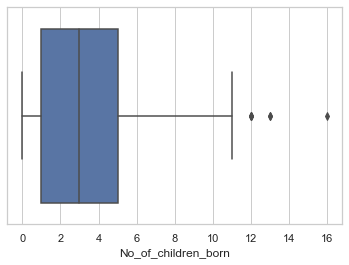

In [52]:
sns.boxplot(x=df1.No_of_children_born)

In [53]:
# Treating One Column Outliers,No_of_children_born 
col =['No_of_children_born']
Q1=df1[col].quantile(0.25)
Q3=df1[col].quantile(0.75)
IQR = Q3-Q1

condition=~((df1[col]< (Q1 - 1.5*IQR)) | (df1[col] > (Q3 + 1.5 * IQR))).any(axis=1)

fill_df1=df1[condition]

In [54]:
tree_df1=df1[condition]

In [55]:
tree_df1.reset_index()

,index,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,0,24.0,2,3,3.0,0,1,2,4,0,1
1,1,45.0,1,3,10.0,0,1,3,3,0,1
2,2,43.0,2,3,7.0,0,1,3,3,0,1
3,3,42.0,3,2,9.0,0,1,3,4,0,1
4,4,36.0,3,3,8.0,0,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1301,1466,42.0,2,4,3.0,0,1,2,3,0,0
1302,1468,33.0,4,4,3.0,0,0,2,3,0,0
1303,1470,39.0,3,3,3.0,0,0,1,3,0,0
1304,1471,33.0,3,3,3.0,0,0,2,2,0,0


In [56]:
fill_df1.reset_index()

,index,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,0,24.0,2,3,3.0,0,1,2,4,0,1
1,1,45.0,1,3,10.0,0,1,3,3,0,1
2,2,43.0,2,3,7.0,0,1,3,3,0,1
3,3,42.0,3,2,9.0,0,1,3,4,0,1
4,4,36.0,3,3,8.0,0,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1301,1466,42.0,2,4,3.0,0,1,2,3,0,0
1302,1468,33.0,4,4,3.0,0,0,2,3,0,0
1303,1470,39.0,3,3,3.0,0,0,1,3,0,0
1304,1471,33.0,3,3,3.0,0,0,2,2,0,0


In [57]:
fill_df1['Contraceptive_method_used']=fill_df1['Contraceptive_method_used'].astype('int')

In [58]:
# Train Test Spilt
X2= fill_df1.drop('Contraceptive_method_used',axis=1)
Y2= fill_df1.pop('Contraceptive_method_used')

In [59]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X2,Y2,test_size=0.30,random_state=1)

In [60]:
y1_train.value_counts(1)

0    0.565646
1    0.434354
Name: Contraceptive_method_used, dtype: float64

In [61]:
y1_test.value_counts(1)

1    0.507653
0    0.492347
Name: Contraceptive_method_used, dtype: float64

# Logistic Regression Model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [64]:
model1=LogisticRegression()
model1.fit(X1_train,y1_train)



LogisticRegression()

In [65]:
model1.fit(X1_train,y1_train)

LogisticRegression()

In [66]:
model1.intercept_

array([1.10212039])

In [67]:
model1.coef_

array([[ 0.07944226, -0.44334872, -0.1316103 , -0.35154588, -0.66263508,
         0.02166494, -0.25928592, -0.17063442,  0.55687751]])

In [68]:
y1_predict=model1.predict(X1_test)

In [69]:
y1_trainpredict=model1.predict(X1_train)

In [70]:
model_score=model1.score(X1_test,y1_test)

In [71]:
model_score_train=model1.score(X1_train,y1_train)

In [72]:
print(model_score_train)

0.6673960612691466


In [73]:
print(model_score)

0.6096938775510204


In [74]:
print(model_score)
print(confusion_matrix(y1_test,y1_predict))
print(classification_report(y1_test,y1_predict))

0.6096938775510204
[[158  35]
 [118  81]]
              precision    recall  f1-score   support

           0       0.57      0.82      0.67       193
           1       0.70      0.41      0.51       199

    accuracy                           0.61       392
   macro avg       0.64      0.61      0.59       392
weighted avg       0.64      0.61      0.59       392



In [75]:
y1_predictprob= model1.predict_proba(X1_test)
pd.DataFrame(y1_predictprob).head()

,0,1
0,0.611803,0.388197
1,0.738735,0.261265
2,0.699772,0.300228
3,0.644874,0.355126
4,0.325091,0.674909


In [76]:
# Confusion matrix for training Data
confusion_matrix(y1_train,y1_trainpredict)

array([[416, 101],
       [203, 194]], dtype=int64)

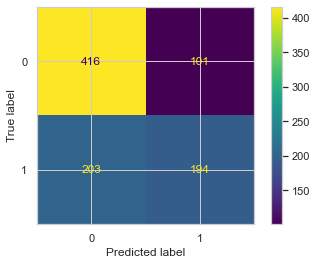

In [77]:
plot_confusion_matrix(model1,X1_train,y1_train);

In [78]:
# confusion_matrix for test data
confusion_matrix(y1_test,y1_predict)

array([[158,  35],
       [118,  81]], dtype=int64)

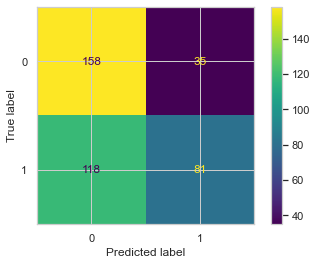

In [79]:
plot_confusion_matrix(model1,X1_test,y1_test)

# Linear Discriminant Analysis Model

In [80]:
# Build LDA
clif=LinearDiscriminantAnalysis()
model=clif.fit(X1_train,y1_train)
model

LinearDiscriminantAnalysis()

# Generate Coefficients and intercept for the Linear Discriminant Function

In [81]:
model.intercept_

array([1.10819295])

In [82]:
model.coef_

array([[ 0.07849492, -0.43795411, -0.12939559, -0.34158978, -0.69467487,
         0.00845422, -0.25831741, -0.18569624,  0.5621857 ]])

In [83]:
X1_train.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure'],
      dtype='object')

Linear Discriminant Function

#### 3.17+(0.07*Wife_age)+(-0.43* Wife_education)+(-0.12 * Husband_education)+(-0.34 * No_of_children_born)+(-0.69 * Wife_religion)+(0.008 * Wife_Working)+(-0.25 * Husband_Occupation)+(-0.18 * Standard_of_living_index)+(0.56 * Media_exposure)

In [84]:
a=model.coef_
np.round(a,2)

array([[ 0.08, -0.44, -0.13, -0.34, -0.69,  0.01, -0.26, -0.19,  0.56]])

# prediction

In [85]:
# train Prediction
pred_class_train=model.predict(X1_train)

# test Prediction
pred_class_test=model.predict(X1_test)

In [86]:
print('Classification Report of training Data: \n\n',classification_report(y1_train,pred_class_train),'\n')
print('Classification Report of test Data: \n\n',classification_report(y1_test,pred_class_test),'\n')

Classification Report of training Data: 

               precision    recall  f1-score   support

           0       0.67      0.81      0.73       517
           1       0.66      0.48      0.55       397

    accuracy                           0.67       914
   macro avg       0.66      0.64      0.64       914
weighted avg       0.67      0.67      0.66       914
 

Classification Report of test Data: 

               precision    recall  f1-score   support

           0       0.57      0.82      0.68       193
           1       0.70      0.40      0.51       199

    accuracy                           0.61       392
   macro avg       0.64      0.61      0.59       392
weighted avg       0.64      0.61      0.59       392
 



# CART Model

In [87]:
tree_df1.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,0,1,2,4,0,1
1,45.0,1,3,10.0,0,1,3,3,0,1
2,43.0,2,3,7.0,0,1,3,3,0,1
3,42.0,3,2,9.0,0,1,3,4,0,1
4,36.0,3,3,8.0,0,1,3,2,0,1


In [88]:
tree_df1.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [89]:
tree_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1306 non-null   float64
 1   Wife_education             1306 non-null   object 
 2   Husband_education          1306 non-null   object 
 3   No_of_children_born        1306 non-null   float64
 4   Wife_religion              1306 non-null   object 
 5   Wife_Working               1306 non-null   object 
 6   Husband_Occupation         1306 non-null   object 
 7   Standard_of_living_index   1306 non-null   object 
 8   Media_exposure             1306 non-null   object 
 9   Contraceptive_method_used  1306 non-null   object 
dtypes: float64(2), object(8)
memory usage: 112.2+ KB


In [90]:
for feature in tree_df1.columns:
    if tree_df1[feature].dtype=='object':
        tree_df1[feature]=pd.Categorical(tree_df1[feature]).codes

In [91]:
tree_df1.Contraceptive_method_used.value_counts(normalize=True)

0    0.543645
1    0.456355
Name: Contraceptive_method_used, dtype: float64

In [92]:
X1=tree_df1.drop('Contraceptive_method_used',axis=1)
Y1=tree_df1.pop('Contraceptive_method_used')

In [93]:
X1.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
0,24.0,1,2,3.0,0,1,1,3,0
1,45.0,0,2,10.0,0,1,2,2,0
2,43.0,1,2,7.0,0,1,2,2,0
3,42.0,2,1,9.0,0,1,2,3,0
4,36.0,2,2,8.0,0,1,2,1,0


In [94]:
x_train,x_test,train_labels,test_labels=train_test_split(X1,Y1,test_size=0.30,random_state=1)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt_model=DecisionTreeClassifier(criterion='gini',random_state=1)

In [97]:
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier(random_state=1)

In [98]:
dt_model.feature_importances_

array([0.29445203, 0.13181817, 0.08259402, 0.23960701, 0.03264596,
       0.04753543, 0.07626761, 0.08427562, 0.01080415])

In [99]:
print(pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=x_train.columns))

                               Imp
Wife_age                  0.294452
Wife_education            0.131818
Husband_education         0.082594
No_of_children_born       0.239607
Wife_religion             0.032646
Wife_Working              0.047535
Husband_Occupation        0.076268
Standard_of_living_index  0.084276
Media_exposure            0.010804


In [100]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('d:ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

# Lets Regularized 

In [101]:
reg_dt_model=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=5)

In [102]:
reg_dt_model.fit(x_train,train_labels)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [103]:
reg_dt_model.feature_importances_

array([0.31504567, 0.1433646 , 0.05035562, 0.46697825, 0.01364011,
       0.        , 0.00789008, 0.00272566, 0.        ])

In [104]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=x_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.466978
Wife_age                  0.315046
Wife_education            0.143365
Husband_education         0.050356
Wife_religion             0.013640
Husband_Occupation        0.007890
Standard_of_living_index  0.002726
Wife_Working              0.000000
Media_exposure            0.000000


In [105]:
ytrain_predict=reg_dt_model.predict(x_train)
ytest_predict=reg_dt_model.predict(x_test)

# Getting the Predicted Classes

In [106]:
ytest_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,

# Getting the Predicted Probabilities

In [107]:
ytest_predict_prob=reg_dt_model.predict_proba(x_test)
ytest_predict_prob

array([[0.83251232, 0.16748768],
       [0.83251232, 0.16748768],
       [0.66847826, 0.33152174],
       [0.66847826, 0.33152174],
       [0.15384615, 0.84615385],
       [0.        , 1.        ],
       [0.62068966, 0.37931034],
       [0.66847826, 0.33152174],
       [0.83251232, 0.16748768],
       [0.23809524, 0.76190476],
       [0.69827586, 0.30172414],
       [0.69827586, 0.30172414],
       [0.69827586, 0.30172414],
       [0.48717949, 0.51282051],
       [0.64285714, 0.35714286],
       [0.23809524, 0.76190476],
       [0.66847826, 0.33152174],
       [0.69827586, 0.30172414],
       [0.4375    , 0.5625    ],
       [0.66847826, 0.33152174],
       [0.62068966, 0.37931034],
       [0.        , 1.        ],
       [0.66847826, 0.33152174],
       [0.66847826, 0.33152174],
       [0.83251232, 0.16748768],
       [0.23809524, 0.76190476],
       [0.83251232, 0.16748768],
       [0.83251232, 0.16748768],
       [0.16326531, 0.83673469],
       [0.83251232, 0.16748768],
       [0.

In [108]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.832512,0.167488
1,0.832512,0.167488
2,0.668478,0.331522
3,0.668478,0.331522
4,0.153846,0.846154


In [109]:
reg_dt_model.score(x_train,train_labels)

0.7352297592997812

In [110]:
reg_dt_model.score(x_test,test_labels)

0.6530612244897959

In [111]:
from sklearn.metrics import roc_auc_score,roc_curve

In [112]:
probs=reg_dt_model.predict_proba(x_train)

In [113]:
probs=probs[:,1]

In [114]:
auc=roc_auc_score(train_labels,probs)
auc

0.7781207216600324

In [115]:
fpr,tpr,thresholds=roc_curve(train_labels,probs)

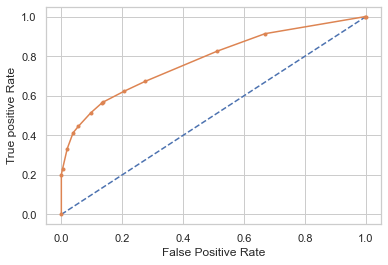

In [116]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.show()

In [117]:
probs1=reg_dt_model.predict_proba(x_test)
probs1=probs1[:,1]

In [118]:
auc=roc_auc_score(test_labels,probs1)

In [119]:
auc

0.6777931106308746

In [120]:
fpr1, tpr1, thresholds1=roc_curve(test_labels,probs1)

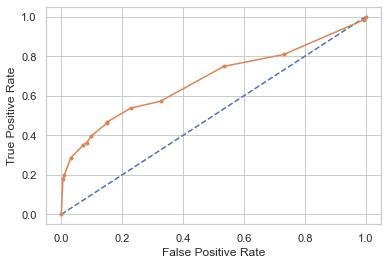

In [121]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [122]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       517
           1       0.76      0.56      0.65       397

    accuracy                           0.74       914
   macro avg       0.74      0.72      0.72       914
weighted avg       0.74      0.74      0.73       914



In [123]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71       193
           1       0.76      0.46      0.58       199

    accuracy                           0.65       392
   macro avg       0.68      0.66      0.64       392
weighted avg       0.68      0.65      0.64       392



In [124]:
confusion_matrix(train_labels,y1_trainpredict)

array([[416, 101],
       [203, 194]], dtype=int64)

In [125]:
confusion_matrix(test_labels,ytest_predict)

array([[164,  29],
       [107,  92]], dtype=int64)

In [126]:
reg_dt_model.score(x_train,train_labels)

0.7352297592997812

In [127]:
reg_dt_model.score(x_test,test_labels)

0.6530612244897959

In [129]:
probs2=y1_predictprob[:,1]


In [130]:
auc=roc_auc_score(y1_test,probs2)

In [131]:
auc

0.6697216653214259

In [132]:
fpr2,tpr2,threshold2=roc_curve(y1_test,probs2)

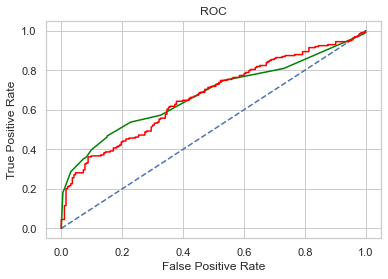

In [133]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr1, tpr1,color='green', label='CArt')
plt.plot(fpr2,tpr2,color='red', label='LoG')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
fpr3,tpr3,threshold3=roc_curve